### Systematic Literature Review - Descriptive Analysis
Tamino Gaub  
12314484  
<tamino.gaub@student.uibk.ac.at>

In [5]:
import warnings
import pandas as pd
import numpy as np

# Suppress specific warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

file_path = '../02_SLR_20250726.xlsx'

# Read the Excel file and filter rows where 'EC/!IC' is NaN
df = pd.read_excel(file_path, sheet_name='SLR - 26.07.2025', header=1)
df = df[df['EC/!IC'].isna()]
df = df[['Nr.', 'ACC', 'REC', 'PRE', 'F1-Score', 'mAP[0.5:0.95]', 'mAP[0.5]']]


# List of columns to convert
cols_to_convert = ['ACC', 'REC', 'PRE', 'F1-Score', 'mAP[0.5:0.95]', 'mAP[0.5]']

for col in cols_to_convert:
    # Step 1: Replace '-' with np.nan
    df[col] = df[col].replace('-', np.nan)

    # Step 2: Explicitly convert the type
    df[col] = pd.to_numeric(df[col], errors='coerce') * 100

df.describe()

,Nr.,ACC,REC,PRE,F1-Score,mAP[0.5:0.95],mAP[0.5]
count,68.000000,40.000000,25.000000,22.000000,22.000000,7.000000,20.000000
mean,65.088235,93.928399,86.192689,90.947273,91.278889,78.622857,84.633500
std,44.229974,5.518498,14.500714,8.753126,9.760534,23.299202,18.396706
min,1.000000,74.750000,47.500000,65.800000,58.000000,30.900000,36.500000
25%,25.750000,92.175000,82.000000,86.237500,89.665000,76.150000,83.050000
50%,66.000000,94.432143,92.000000,93.913333,93.390000,85.010000,89.250000
75%,94.500000,98.700000,95.500000,97.000000,98.012500,91.825000,97.950000
max,154.000000,99.900000,100.000000,100.000000,99.700000,98.500000,99.830000


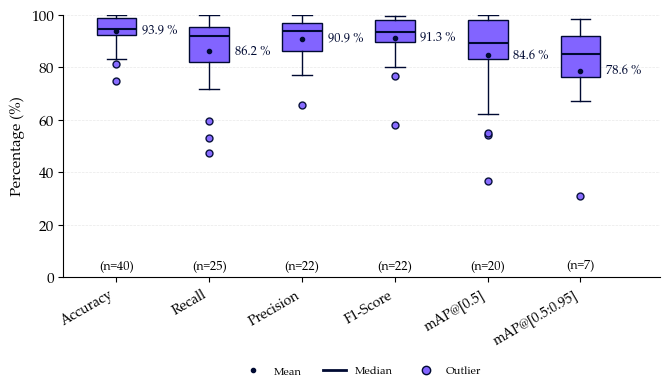

In [6]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.lines import Line2D

# Settings
cols = ['ACC', 'REC', 'PRE', 'F1-Score', 'mAP[0.5]', 'mAP[0.5:0.95]']
xtick_labels = ['Accuracy', 'Recall', 'Precision', 'F1-Score', 'mAP@[0.5]', 'mAP@[0.5:0.95]',]

# CI Colors
nightBlue = '#000a32'
purple = '#8264ff'
lightGray = '#e6e6e6'
darkGray = '#787882'

# Palatino font
palatino_regular = fm.FontProperties(fname=r"C:\WINDOWS\Fonts\PALA.TTF", size=10)
palatino_small = fm.FontProperties(fname=r"C:\WINDOWS\Fonts\PALA.TTF", size=8)

# Data Preparation
data_for_plot, medians, means, counts = [], [], [], []
for c in cols:
    arr = df[c].dropna().astype(float).values
    data_for_plot.append(arr)
    counts.append(arr.size)
    medians.append(np.nan if arr.size == 0 else np.median(arr))
    means.append(np.nan if arr.size == 0 else np.mean(arr))

# Layout and Plot
fig, ax = plt.subplots(figsize=(6.8, 4.2))
pos_factor = 1.4
positions = np.arange(1, len(cols) + 1) * pos_factor

# === Boxplot ===
box = ax.boxplot(
    data_for_plot,
    positions=positions,
    widths=0.6,
    patch_artist=True,
    showfliers=True,
    showmeans=True,
    flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': purple,
                'markeredgecolor': nightBlue, 'alpha': 0.95},
    boxprops={'facecolor': purple, 'edgecolor': nightBlue, 'linewidth': 1},
    whiskerprops={'color': nightBlue, 'linewidth': 1},
    capprops={'color': nightBlue, 'linewidth': 1},
    medianprops={'color': nightBlue, 'linewidth': 1.5},
    meanprops={'marker': 'o', 'markerfacecolor': nightBlue, 'markeredgecolor': nightBlue, 'markersize': 3},
    whis=1.5
)

# X-Ticks
ax.set_xticks(positions)
ax.set_xticklabels(xtick_labels, rotation=30, ha='right',
                   fontproperties=palatino_regular, fontsize=10)

# Create space on the side for mean values
ax.set_xlim(positions[0] - 0.8, positions[-1] + 1.2)

# Sample size n over the x-axis
for pos, n in zip(positions, counts):
    ax.text(pos, 0.07, f"(n={n})",
            transform=ax.get_xaxis_transform(),  # refers to axis
            ha='center', va='top',
            fontproperties=palatino_small, fontsize=9,
            color='#000000')

# Mean values on the right just outside the box
if len(positions) > 1:
    spacing = positions[1] - positions[0]
else:
    spacing = 1.0
x_offset = 0.06 * spacing  # small offset

for i, med in enumerate(means):
    if np.isnan(med):
        continue
    verts = box['boxes'][i].get_path().vertices
    x_right_box = np.max(verts[:, 0])
    x_text = x_right_box + x_offset
    ax.text(x_text, med, f"{med:.1f} %",
            ha='left', va='center',
            fontproperties=palatino_regular, fontsize=9,
            color=nightBlue)

# Labels and Limits
ax.set_ylabel('Percentage (%)', fontproperties=palatino_regular, fontsize=11)
ax.set_ylim(0, 100)

for lbl in ax.get_yticklabels():
    lbl.set_fontproperties(palatino_regular)
    lbl.set_fontsize(11)

# Legend bottom right in the plot area
median_handle = Line2D([0], [0], color=nightBlue, lw=2, label='Median')
mean_handle = Line2D([0], [0], marker='.', color='w', markerfacecolor=nightBlue,
                     markeredgecolor=nightBlue, markersize=6, linestyle='None', label='Mean')
outlier_handle = Line2D([0], [0], marker='o', color='w', markerfacecolor=purple,
                        markeredgecolor=nightBlue, markersize=6, linestyle='None', label='Outlier')

ax.legend(handles=[mean_handle, median_handle, outlier_handle],
          loc='upper center', bbox_to_anchor=(0.5, -0.3),  # below the axis
          ncol=3, prop=palatino_small, frameon=False)

# Final Adjustments
ax.grid(axis='y', linestyle='--', linewidth=0.5, color=lightGray, alpha=0.9)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('Plot Outputs/05_Performance_Measurements.pdf', dpi=600, bbox_inches='tight', transparent=True)
plt.show()


In [7]:
# Mean and Median Values for ACC, REC, PRE, F1-Score, mAP[0.5:0.95], mAP[0.5] (excluding 'Nr.')
mean_values = df.drop(columns='Nr.').mean()
median_values = df.drop(columns='Nr.').median()
print("Mean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)

Mean Values:
 ACC              93.928399
REC              86.192689
PRE              90.947273
F1-Score         91.278889
mAP[0.5:0.95]    78.622857
mAP[0.5]         84.633500
dtype: float64

Median Values:
 ACC              94.432143
REC              92.000000
PRE              93.913333
F1-Score         93.390000
mAP[0.5:0.95]    85.010000
mAP[0.5]         89.250000
dtype: float64


# Plot Measurement Time

In [8]:
file_path = '../02_SLR_20250726.xlsx'

# Read the Excel file and filter rows where 'EC/!IC' is NaN
df_2 = pd.read_excel(file_path, sheet_name='SLR - 26.07.2025', header=1)
df_2 = df_2[df_2['EC/!IC'].isna()]
df_2 = df_2[['Nr.', 'Measurement Time (ms)']]

df_2['Measurement Time (ms)'] = df_2['Measurement Time (ms)'].replace('-', np.nan)
df_2['Measurement Time (ms)'] = pd.to_numeric(df_2['Measurement Time (ms)'], errors='coerce')

df_2.describe()

,Nr.,Measurement Time (ms)
count,68.000000,25.000000
mean,65.088235,365.150970
std,44.229974,729.108281
min,1.000000,4.900000
25%,25.750000,18.220000
50%,66.000000,49.200000
75%,94.500000,260.000000
max,154.000000,3100.000000


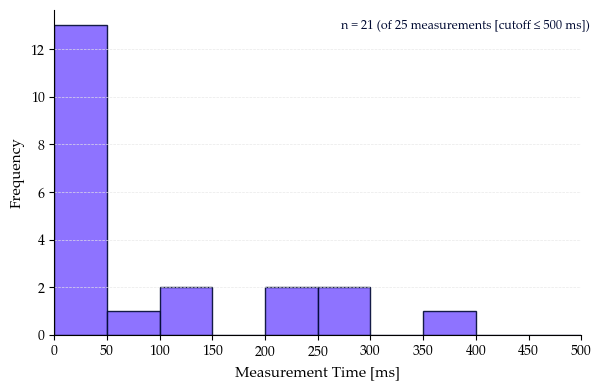

In [9]:
# CI-Colors
nightBlue = '#000a32'
purple    = '#8264ff'
lightGray  = '#e6e6e6'
darkGray = '#787882'

# Palatino Fonts
palatino_regular = fm.FontProperties(fname=r"C:\WINDOWS\Fonts\PALA.TTF", size=10)
palatino_small   = fm.FontProperties(fname=r"C:\WINDOWS\Fonts\PALA.TTF", size=8)

# Data
data = df_2['Measurement Time (ms)'].dropna().astype(float)
n = len(data)

# Bins every 50 ms up to 500 ms
bins = np.arange(0, 550, 50)

# Plot
fig, ax = plt.subplots(figsize=(6.2, 4.0))

ax.hist(
    data,
    bins=bins,
    color=purple,
    edgecolor=nightBlue,
    alpha=0.9
)

# Labels
ax.set_xlabel("Measurement Time [ms]", fontproperties=palatino_regular, fontsize=11)
ax.set_ylabel("Frequency", fontproperties=palatino_regular, fontsize=11)

# X-Ticks exactly at the bin edges
ax.set_xticks(bins)
ax.set_xlim(0, 500)

# Tick-Fonts
for lbl in ax.get_xticklabels():
    lbl.set_fontproperties(palatino_regular)
    lbl.set_fontsize(10)
for lbl in ax.get_yticklabels():
    lbl.set_fontproperties(palatino_regular)
    lbl.set_fontsize(10)

# n = number of measurements with Measurement Time ≤ 500 ms
values_over_500 = df_2[df_2['Measurement Time (ms)'] > 500]
values_under_500 = len(data)-len(values_over_500)

ax.text(0.78, 0.97, f"n = {values_under_500} (of {len(data)} measurements [cutoff ≤ 500 ms])",
        transform=ax.transAxes,
        ha='center', va='top',
        fontproperties=palatino_small, fontsize=9, color=nightBlue)

# Final Adjustments
ax.grid(axis='y', linestyle='--', linewidth=0.5, color=lightGray, alpha=0.9)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("Plot Outputs/06_Measurement_Time.pdf", dpi=600, bbox_inches="tight", transparent=True)
plt.show()

In [10]:
print("Values are for the whole dataset including outliers (>500 ms):")
print("Measurement Time Mean:", df_2['Measurement Time (ms)'].mean())
print("Measurement Time Median:", df_2['Measurement Time (ms)'].median())
print("Measurement Time Max:", df_2['Measurement Time (ms)'].max())
print("Measurement Time Min:", df_2['Measurement Time (ms)'].min())
print("--------------------------------------------\n")

values_under_500 = df_2[df_2['Measurement Time (ms)'] <= 500]
print("Values are for the reduced dataset excluding outliers (<=500 ms):")
print("Measurement Time Mean:", values_under_500['Measurement Time (ms)'].mean())
print("Measurement Time Median:", values_under_500['Measurement Time (ms)'].median())
print("Measurement Time Max:", values_under_500['Measurement Time (ms)'].max())
print("Measurement Time Min:", values_under_500['Measurement Time (ms)'].min())

Values are for the whole dataset including outliers (>500 ms):
Measurement Time Mean: 365.1509703233093
Measurement Time Median: 49.2
Measurement Time Max: 3100.0
Measurement Time Min: 4.9
--------------------------------------------

Values are for the reduced dataset excluding outliers (<=500 ms):
Measurement Time Mean: 93.01305990870159
Measurement Time Median: 42.0
Measurement Time Max: 350.0
Measurement Time Min: 4.9


### Input Image Size in Pixel

In [11]:
file_path = '../02_SLR_20250726.xlsx'

# Read the Excel file and filter rows where 'EC/!IC' is NaN
df_3 = pd.read_excel(file_path, sheet_name='SLR - 26.07.2025', header=1)
df_3 = df_3[df_3['EC/!IC'].isna()]
df_3 = df_3[['Nr.', 'Model Input Image Size']]

df_3 = df_3[df_3['Model Input Image Size'].str.contains('x', na=False)]

len(df_3['Model Input Image Size'])

59

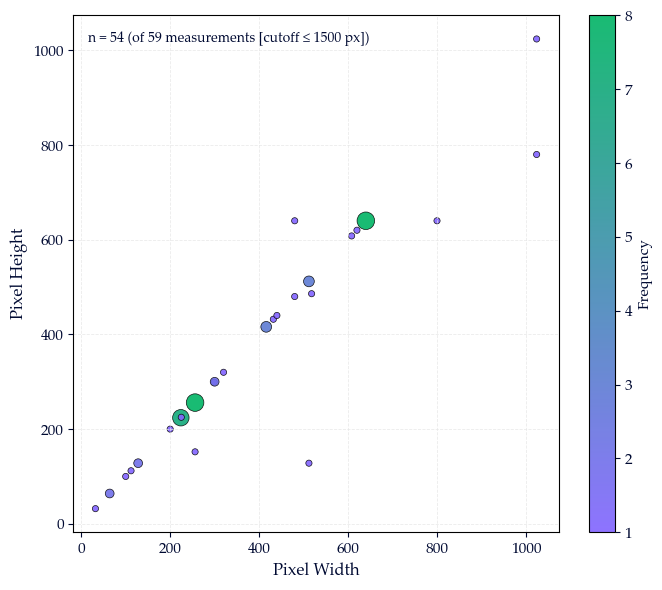

In [12]:
from matplotlib.colors import LinearSegmentedColormap

# Function to extract width and height from 'Model Input Image Size'
def extract_dimensions(value):
    parts = value.split('x')
    if len(parts) >= 2:
        try:
            width = int(parts[0].strip().split()[-1])
            height = int(parts[1].strip().split()[0])
            return pd.Series([width, height])
        except ValueError:
            return pd.Series([None, None])
    return pd.Series([None, None])

# Create new columns for Pixel Width and Pixel Height
df_3[['Pixel Width', 'Pixel Height']] = df_3['Model Input Image Size'].apply(extract_dimensions)


# CI-Colors
nightBlue = '#000a32'
purple = '#8264ff'
lightGray = '#e6e6e6'
green = '#00b464'

# Load font
palatino_regular = fm.FontProperties(fname=r"C:\WINDOWS\Fonts\PALA.TTF", size=11)

# Custom Colormap from Purple to Green
ci_cmap = LinearSegmentedColormap.from_list("CI_cmap", [purple, green])

# Cutoff at 1500 px for both width and height
df_filtered = df_3[(df_3['Pixel Width'] <= 1500) & (df_3['Pixel Height'] <= 1500)]

# Group by pixel sizes and count frequency
size_counts = df_filtered.groupby(['Pixel Width', 'Pixel Height']).size().reset_index(name='Count')

# Scatterplot
plt.figure(figsize=(7, 6))
scatter = plt.scatter(
    size_counts['Pixel Width'], size_counts['Pixel Height'],
    s=size_counts['Count'] * 20,     # Punktgröße ~ Häufigkeit
    c=size_counts['Count'],          # Farbe nach Häufigkeit
    cmap=ci_cmap,
    alpha=0.9,
    edgecolors='black', linewidths=0.5
)

# Colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Frequency', fontproperties=palatino_regular, color=nightBlue, fontsize=11)
cbar.ax.tick_params(colors=nightBlue, labelsize=9)
for lbl in cbar.ax.get_yticklabels():
    lbl.set_fontproperties(palatino_regular)

# Axis labels
plt.xlabel('Pixel Width', fontproperties=palatino_regular, color=nightBlue, fontsize=12)
plt.ylabel('Pixel Height', fontproperties=palatino_regular, color=nightBlue, fontsize=12)

# Add Cutoff Information
n_cutoff = len(df_filtered)
plt.text(0.32, 0.97, f"n = {n_cutoff} (of {len(df_3)} measurements [cutoff ≤ 1500 px])",
         transform=plt.gca().transAxes,
         ha='center', va='top',
         fontproperties=palatino_regular, fontsize=10, color=nightBlue)

# Add Grid
plt.grid(True, color=lightGray, linestyle='--', linewidth=0.6, alpha=0.8)

# Ticks
plt.tick_params(axis='both', colors=nightBlue, labelsize=10)
for lbl in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    lbl.set_fontproperties(palatino_regular)


plt.tight_layout()
plt.savefig('Plot Outputs/07_Pixel_Sizes.pdf', dpi=600, bbox_inches='tight', transparent=True)
plt.show()


In [13]:
# Count occurrences of each (Pixel Width, Pixel Height) combination
top_combinations = (
    df_3.groupby(['Pixel Width', 'Pixel Height'])
    .size()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
)

# Show top 10 combinations
top_combinations.head(10)

,Pixel Width,Pixel Height,Count
10,256,256,8
24,640,640,8
7,224,224,7
14,416,416,3
20,512,512,3
12,300,300,2
4,128,128,2
1,64,64,2
6,200,2050,1
5,200,200,1


# Dataset Size

In [14]:
file_path = '../02_SLR_20250726.xlsx'

# Read the Excel file and filter rows where 'EC/!IC' is NaN
df_4 = pd.read_excel(file_path, sheet_name='SLR - 26.07.2025', header=1)
df_4 = df_4[df_4['EC/!IC'].isna()]
df_4 = df_4[['Nr.', 'Dataset Size']]

df_4['Dataset Size'] = pd.to_numeric(df_4['Dataset Size'], errors='coerce').dropna().astype(int)

df_4.describe()

,Nr.,Dataset Size
count,68.000000,6.700000e+01
mean,65.088235,2.889555e+04
std,44.229974,1.584272e+05
min,1.000000,2.800000e+01
25%,25.750000,1.450000e+03
50%,66.000000,3.231000e+03
75%,94.500000,1.088200e+04
max,154.000000,1.299200e+06


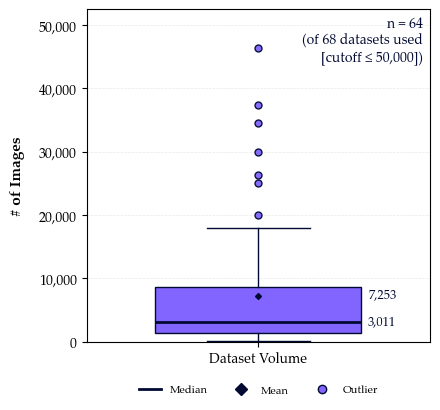

In [15]:
from matplotlib.ticker import FuncFormatter

# CI-Colors
nightBlue = '#000a32'
purple    = '#8264ff'
lightGray  = '#e6e6e6'
darkGray = '#787882'

# Palatino Fonts
palatino_regular = fm.FontProperties(fname=r"C:\WINDOWS\Fonts\PALA.TTF", size=10)
palatino_small   = fm.FontProperties(fname=r"C:\WINDOWS\Fonts\PALA.TTF", size=8)
palatino_bold    = fm.FontProperties(fname=r"C:\WINDOWS\Fonts\PALAB.TTF", size=11)

# Data Preprocessing
data = df_4['Dataset Size'].dropna().astype(float)
data = data[data < 50000]  # Cutoff
n = len(data)
median_val = np.median(data)
mean_val   = np.mean(data)

# Create Boxplot
fig, ax = plt.subplots(figsize=(4.5, 4.2))

box = ax.boxplot(
    [data],
    positions=[1],
    widths=0.6,
    patch_artist=True,
    showfliers=True,
    showmeans=True,
    flierprops={
        'marker': 'o',
        'markersize': 5,
        'markerfacecolor': purple,
        'markeredgecolor': nightBlue,
        'alpha': 0.95
    },
    boxprops={
        'facecolor': purple,
        'edgecolor': nightBlue,
        'linewidth': 1
    },
    whiskerprops={
        'color': nightBlue,
        'linewidth': 1
    },
    capprops={
        'color': nightBlue,
        'linewidth': 1
    },
    medianprops={
        'color': nightBlue,
        'linewidth': 2
    },
    meanprops={
        'marker': 'D',
        'markerfacecolor': nightBlue,
        'markeredgecolor': nightBlue,
        'markersize': 3
    },
    whis=1.5
)

# Axis labelling
ax.set_xticks([1])
ax.set_xticklabels(['Dataset Volume'],
                   fontproperties=palatino_bold, fontsize=11)

ax.set_ylabel('# of Images', fontproperties=palatino_bold, fontsize=11, labelpad=10)
ax.set_ylim(0, 52500)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Ticks formatting
ax.tick_params(axis='both', labelsize=11)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(palatino_regular)

# Median Value right next to the box
verts = box['boxes'][0].get_path().vertices
x_right_box = np.max(verts[:, 0])
x_text = x_right_box + 0.02
ax.text(x_text, median_val, f"{median_val:,.0f}",
        ha='left', va='center',
        fontproperties=palatino_regular, fontsize=9,
        color=nightBlue)

# Mean value right next to the box
verts = box['boxes'][0].get_path().vertices
x_right_box = np.max(verts[:, 0])
x_text = x_right_box + 0.02
ax.text(x_text, mean_val, f"{int(round(mean_val)):,}",
        ha='left', va='center',
        fontproperties=palatino_regular, fontsize=9,
        color=nightBlue)

# Add n information
n_cutoff = len(data)
plt.text(0.98, 0.98, f"n = {n_cutoff}\n(of {len(df_4)} datasets used\n[cutoff ≤ 50,000])",
         transform=plt.gca().transAxes,
         ha='right', va='top',
         fontproperties=palatino_regular, fontsize=10, color=nightBlue)

# Legend
median_handle = Line2D([0], [0], color=nightBlue, lw=2, label='Median')
mean_handle = Line2D([0], [0], marker='D', color='w', markerfacecolor=nightBlue,
                     markeredgecolor=nightBlue, markersize=6, linestyle='None', label='Mean')
outlier_handle = Line2D([0], [0], marker='o', color='w', markerfacecolor=purple,
                        markeredgecolor=nightBlue, markersize=6, linestyle='None', label='Outlier')

ax.legend(handles=[median_handle, mean_handle, outlier_handle],
          loc='upper center', bbox_to_anchor=(0.5, -0.1),
          ncol=3, prop=palatino_small, frameon=False)

# Add Grid
ax.grid(axis='y', linestyle='--', linewidth=0.5, color=lightGray, alpha=0.9)

plt.tight_layout()
plt.savefig('Plot Outputs/08_Dataset_Size.pdf', dpi=600, bbox_inches='tight', transparent=True)
plt.show()


In [17]:
# Boxplot values for the filtered data (<50,000 images)
q1 = data.quantile(0.25)
median_val = data.median()
q3 = data.quantile(0.75)
iqr = q3 - q1
minimum = data.min()
maximum = data.max()

print("Boxplot values for the filtered data (<50,000 images):")
print(f"Minimum: {minimum:,.0f}")
print(f"Q1 (25th percentile): {q1:,.0f}")
print(f"Median (50th percentile): {median_val:,.0f}")
print(f"Q3 (75th percentile): {q3:,.0f}")
print(f"Maximum: {maximum:,.0f}")
print(f"IQR (Q3 - Q1): {iqr:,.0f}")
print("\n--------------------------------\n")

print("Values are for the datasets in the plot (<50,000 images):")
print("Dataset Size Mean:", data.mean())
print("Dataset Size Median:", data.median())
print("Dataset Size Max:", data.max())
print("Dataset Size Min:", data.min())
print("\n--------------------------------\n")

print("Values are for the whole dataset including outliers (>50,000 images):")
print("Dataset Size Mean:", df_4['Dataset Size'].mean())
print("Dataset Size Median:", df_4['Dataset Size'].median())
print("Dataset Size Max:", df_4['Dataset Size'].max())
print("Dataset Size Min:", df_4['Dataset Size'].min())

Boxplot values for the filtered data (<50,000 images):
Minimum: 28
Q1 (25th percentile): 1,350
Median (50th percentile): 3,011
Q3 (75th percentile): 8,633
Maximum: 46,293
IQR (Q3 - Q1): 7,283

--------------------------------

Values are for the datasets in the plot (<50,000 images):
Dataset Size Mean: 7253.015625
Dataset Size Median: 3011.0
Dataset Size Max: 46293.0
Dataset Size Min: 28.0

--------------------------------

Values are for the whole dataset including outliers (>50,000 images):
Dataset Size Mean: 28895.55223880597
Dataset Size Median: 3231.0
Dataset Size Max: 1299200.0
Dataset Size Min: 28.0


## AI-Methods

In [12]:
file_path = '../02_SLR_20250726.xlsx'

# Read the Excel file and filter rows where 'EC/!IC' is NaN
df_5 = pd.read_excel(file_path, sheet_name='SLR - 26.07.2025', header=1)
df_5 = df_5[df_5['EC/!IC'].isna()]
df_5 = df_5[['Nr.', 'AI-Method']]

df_5['AI-Method'] = df_5['AI-Method'].astype(str)

df_5.head(2)

,Nr.,AI-Method
4,1,CNN; FCN
5,2,CNN


In [ ]:
from collections import Counter

# Define Categories
categories = {
    "CNN": ["cnn", "deep cnn", "faster r-cnn", "sdia-net", "convolutional u-net", "u-net", "vit-cnn", "vgg", "densenet", "efficientnet", "fcn", "siamese cnn", "convolutional spatial-to-depth"],
    "Autoencoder": ["autoencoder", "autoencoders", "convolutional autoencoder", "cae", "autoclassifier"],
    "GANs": ["gans", "generative adversarial"],
    "Transformer": ["transformer", "vision transformer", "vit", "visual self-attention", "large language model", "llm"],
    "SVM": ["support vector", "svm"],
    "GNN": ["graph neural", "gnn"],
    "RandomForest": ["random forest", "rf"],
    "NAS": ["neural architecture search", "nas"],
    "FNN": ["feedforward neural network", "fnn"],
    "GA": ["genetic algorithm", "ga"],
    "Diffusion": ["denoising diffusion", "ddpm"],
    "Optimization": ["bayesian optimization", "bayeesian optimization"],
    "Transfer Learning": ["transfer learning"]
}

def normalize_method(method):
    """Assigns an entry to a category, if possible, otherwise return original."""
    m = method.lower().strip()
    for cat, keywords in categories.items():
        if any(kw in m for kw in keywords):
            return cat
    return "Others"  # everything else stays the same

# Split at Semicolon
methods_split = df_5['AI-Method'].dropna().str.split(';')

# Normalize per line and avoid duplicates
all_methods = []
for sublist in methods_split:
    normalized = {normalize_method(m) for m in sublist if m.strip() != ""}  # Set pro Paper
    all_methods.extend(normalized)

# Count
method_counts = Counter(all_methods)

# Create DataFrame including percentage
method_counts_df = pd.DataFrame(method_counts.most_common(), columns=['Method', 'Count'])

# Total number of all identified methods (mentions)
total_identified = method_counts_df['Count'].sum()

# Calculate percentage
grouped_counts = Counter()
for name, cnt in method_counts.items():
    if cnt == 1:
        grouped_counts['Others'] += 1
    else:
        grouped_counts[name] = cnt

# Create DataFrame including percentage
method_counts_df = pd.DataFrame(grouped_counts.most_common(), columns=['Method', 'Count'])
total_identified = method_counts_df['Count'].sum()
method_counts_df['Percentage (%)'] = (method_counts_df['Count'] / total_identified * 100).round(1)
method_counts_df = method_counts_df.sort_values('Count', ascending=False).reset_index(drop=True)

print(method_counts_df)
print('Sum: ', method_counts_df['Count'].sum())


        Method  Count  Percentage (%)
0          CNN     66            63.5
1       Others     22            21.2
2  Autoencoder      5             4.8
3  Transformer      5             4.8
4          SVM      4             3.8
5         GANs      2             1.9
Sum:  104


## AI-Model Basis

In [14]:
file_path = '../02_SLR_20250726.xlsx'

# Read the Excel file and filter rows where 'EC/!IC' is NaN
df_6 = pd.read_excel(file_path, sheet_name='SLR - 26.07.2025', header=1)
df_6 = df_6[df_6['EC/!IC'].isna()]
df_6 = df_6[['Nr.', 'Backbone']]

# Remove all rows with '-' in the column 'Backbone' from df_6
df_6 = df_6.drop(df_6[df_6['Backbone'] == '-'].index)
df_6['Backbone'] = df_6['Backbone'].astype(str)

df_6

,Nr.,Backbone
19,8,Swin model
21,11,ResNet50
31,21,VGG-16
32,22,ResNet50
36,23,EfficientNetB6
42,30,SqueezeNet
49,35,VGG-16; DenseNet-121; EfficientNetV2/B; ViT-B/16
50,36,Inception V3; MobileNet V2; NasNet Large
53,43,ResNet50; Residual Block (RB); Residual Squeez...
54,45,ResNet-18


In [15]:
import re

# Backbones definieren
backbone_categories = {
    "ResNet": ["resnet18", "resnet-18", "resnet34", "resnet50", "resnet101", "res2net50"],
    "MobileNet": ["mobilenet", "mobilenetv2", "mobilenet v2", "quantized ssd mobilenet"],
    "EfficientNet": ["efficientnetb6", "efficientnetv2/b", "efficientnet"],
    "VGG": ["vgg16", "vgg-16", "vgg"],
    "DenseNet": ["densenet121", "densenet-121", "densenet"],
    "Inception": ["inceptionv3", "inception v3"],
    "UNet": ["unet"],
    "SqueezeNet": ["squeezenet"],
    "NASNet": ["nasnet", "nasnet large"],
    "Transformer": ["vit", "vit-b/16", "swin", "transformer", "rt-detr"]
}

# Function: find category if there is a keyword in the string
def find_backbones(text):
    if not isinstance(text, str):
        return []
    text = text.lower()
    matches = []
    for cat, keywords in backbone_categories.items():
        for kw in keywords:
            if kw.lower() in text:
                matches.append(cat)
                break
    return matches

# Split at semicolon or comma
all_backbones = []
for entry in df_6['Backbone'].dropna():
    parts = [p.strip() for p in re.split(r'[;,]', entry) if p.strip() not in ["", "-"]]
    for p in parts:
        all_backbones.extend(find_backbones(p))

# Counter
backbone_counts = Counter(all_backbones)

# Calculate total for percentage
total = sum(backbone_counts.values())

# Save results in a DataFrame including percentage
df_backbones = pd.DataFrame(
    [(cat, count, round(100*count/total, 1)) for cat, count in backbone_counts.most_common()],
    columns=["Backbone", "Count", "Percentage (%)"]
)

print(df_backbones)
print('Sum: ', df_backbones['Count'].sum())

       Backbone  Count  Percentage (%)
0        ResNet     19            51.4
1     MobileNet      5            13.5
2   Transformer      3             8.1
3           VGG      3             8.1
4  EfficientNet      2             5.4
5    SqueezeNet      2             5.4
6      DenseNet      1             2.7
7     Inception      1             2.7
8        NASNet      1             2.7
Sum:  37


# Frameworks

In [16]:
file_path = '../02_SLR_20250726.xlsx'

# Read the Excel file and filter rows where 'EC/!IC' is NaN
df_7 = pd.read_excel(file_path, sheet_name='SLR - 26.07.2025', header=1)
df_7 = df_7[df_7['EC/!IC'].isna()]
df_7 = df_7[['Nr.', 'Framework']]

# Remove all rows with '-' in the column 'Framework' from df_7
df_7 = df_7.drop(df_7[df_7['Framework'] == '-'].index)
df_7['Framework'] = df_7['Framework'].astype(str)

# Show distinct Frameworks
df_7['Framework'].unique()

array(['YOLOv3-SPP', 'YOLOv8', 'YOLOv3', 'YOLOv3; YOLOv4', 'YOLOv3-tiny',
       'YOLOv7', 'YOLOv5', 'YOLOv8 (ELA-YOLO)', 'YOLOv5s', 'LFF-YOLOv8',
       'Real-Time DEtection Transformer (RT-DETR)', 'YOLO', 'YOLOv11x',
       'Quantized SSD Mobilenet'], dtype=object)

In [19]:
# Count occurrences of YOLO and its versions
yolo_count = df_7['Framework'].str.contains('yolo', case=False, na=False).astype(int).sum()
yolov3_count = df_7['Framework'].str.contains('yolov3', case=False, na=False).sum()
yolov4_count = df_7['Framework'].str.contains('yolov4', case=False, na=False).sum()
yolov5_count = df_7['Framework'].str.contains('yolov5', case=False, na=False).sum()
yolov8_count = df_7['Framework'].str.contains('yolov8', case=False, na=False).sum()
yolov11_count = df_7['Framework'].str.contains('yolov11', case=False, na=False).sum()
yolo_exact_count = df_7['Framework'].str.fullmatch(r'(?i)YOLO', na=False).sum()

print("YOLO Count (all versions):", yolo_count)
print("YOLOv3 Count:", yolov3_count)
print("YOLOv4 Count:", yolov4_count)
print("YOLOv5 Count:", yolov5_count)
print("YOLOv8 Count:", yolov8_count)
print("YOLOv11 Count:", yolov11_count)
print("YOLO version not given:", yolo_exact_count)

YOLO Count (all versions): 21
YOLOv3 Count: 5
YOLOv4 Count: 1
YOLOv5 Count: 6
YOLOv8 Count: 7
YOLOv11 Count: 1
YOLO version not given: 1
